In [20]:
!pip install -q yfinance
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for using np.pi


In [21]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define tech_list with the names of the stocks you want to access
tech_list = ['AAPL', 'MSFT', 'GOOGL']

# Set up date range
end = datetime.now() - timedelta(days=1)
start = datetime(end.year - 1, end.month, end.day)

# Fetch stock data directly
data_dict = {}
for stock in tech_list:
    data_dict[stock] = yf.download(stock, start=start, end=end)

# Print the fetched data for each stock
for stock in tech_list:
    print(f"{stock} data:")
    print(data_dict[stock].head())

# Add company names and concatenate data
company_name = ['Apple Inc.', 'Microsoft Corp.', 'Alphabet Inc.']
for stock, name in zip(tech_list, company_name):
    data_dict[stock]["company_name"] = name

df = pd.concat(data_dict.values(), axis=0).reset_index()  # Reset index after concatenation
print(df.tail(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL data:
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2024-01-02 00:00:00+00:00  184.734970  185.639999  188.440002  183.889999   
2024-01-03 00:00:00+00:00  183.351746  184.250000  185.880005  183.429993   
2024-01-04 00:00:00+00:00  181.023163  181.910004  183.089996  180.880005   
2024-01-05 00:00:00+00:00  180.296722  181.179993  182.759995  180.169998   
2024-01-08 00:00:00+00:00  184.655365  185.559998  185.600006  181.500000   

Price                            Open    Volume  
Ticker                           AAPL      AAPL  
Date                                             
2024-01-02 00:00:00+00:00  187.149994  82488700  
2024-01-03 00:00:00+00:00  184.220001  58414500  
2024-01-04 00:00:00+00:00  182.149994  71983600  
2024-01-05 00:00:00+00:00  181.990005  62303300  
2024-01-08 00:00:00+00

In [24]:
df.to_csv("stock_data.csv", index=False)


In [26]:
# Obtain descriptive statistics
descriptive_stats = df.describe()

# Print the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    206.770073  207.205912  208.910318  205.216429  206.952341   
std      25.715412   25.502993   25.580905   25.132619   25.332993   
min     164.405121  165.000000  166.399994  164.080002  165.350006   
25%     183.452488  184.224998  185.134995  182.204998  183.827499   
50%     213.782074  214.264999  216.839996  211.945000  214.309998   
75%     227.147587  227.489998  229.402496  225.219997  227.449997   
max     259.019989  259.019989  260.100006  257.630005  258.190002   

Price         Volume   Adj Close       Close        High         Low  \
Ticker          AAPL        MSFT        MSFT        MSFT        MSFT   
count   2.520000e+02  252.000000  252.000000  252.000000  252.000000   
mean    5.712721e+07  419.490270  420.312301  423.632897  4

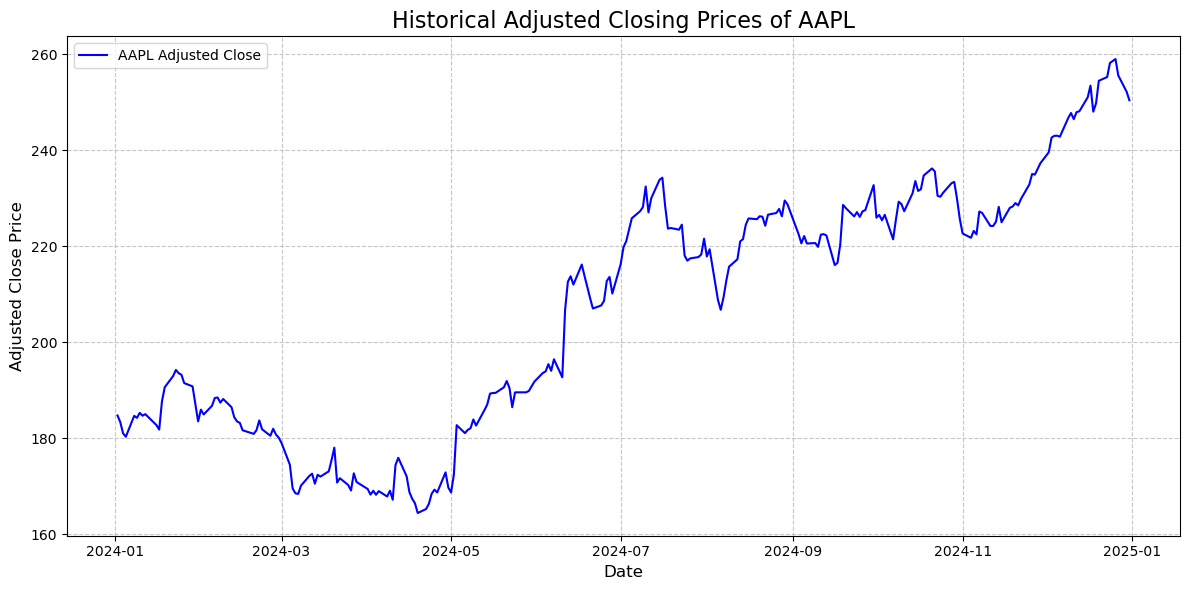

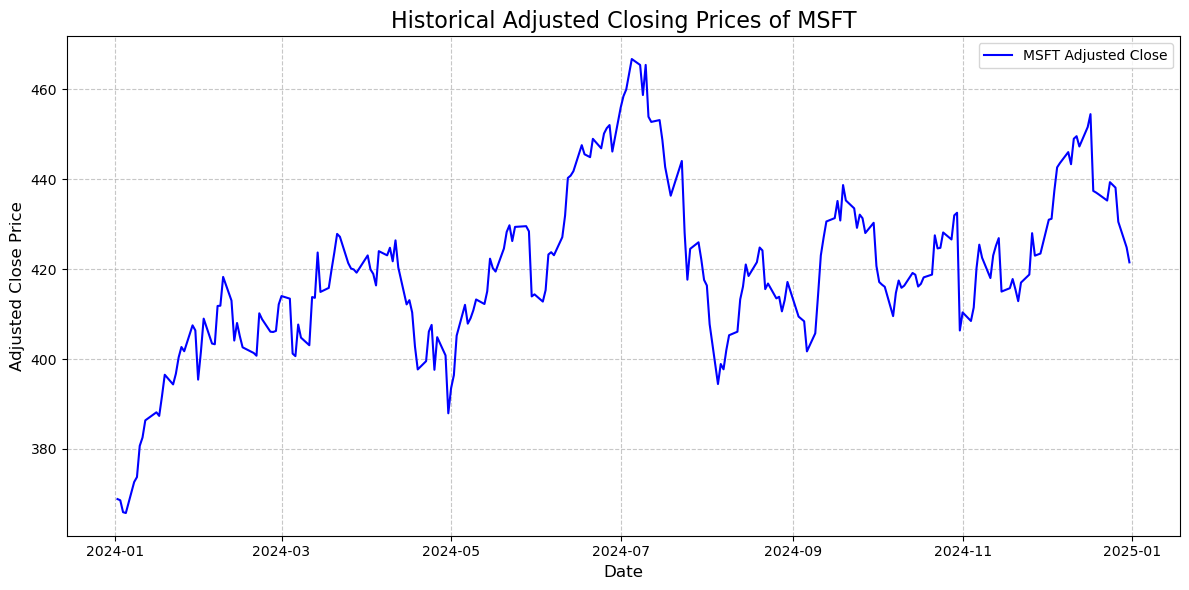

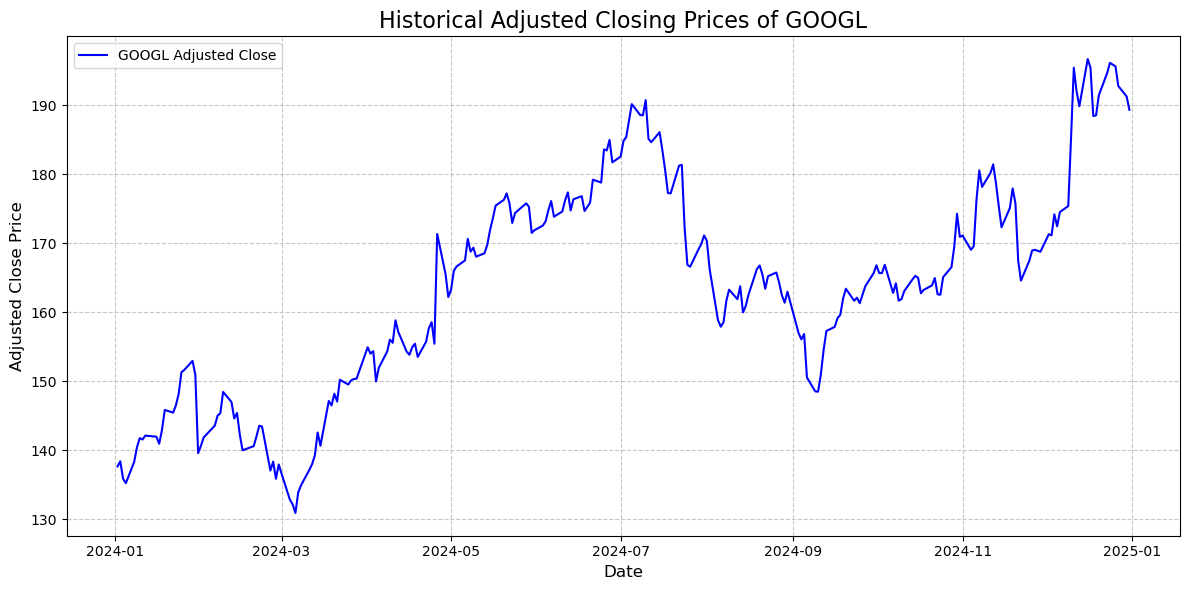

In [28]:
# Generate individual plots for each company closing price
for stock in tech_list:
    plt.figure(figsize=(12, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Adj Close'], label=f'{stock} Adjusted Close', color='blue')
    plt.title(f'Historical Adjusted Closing Prices of {stock}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Adjusted Close Price', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

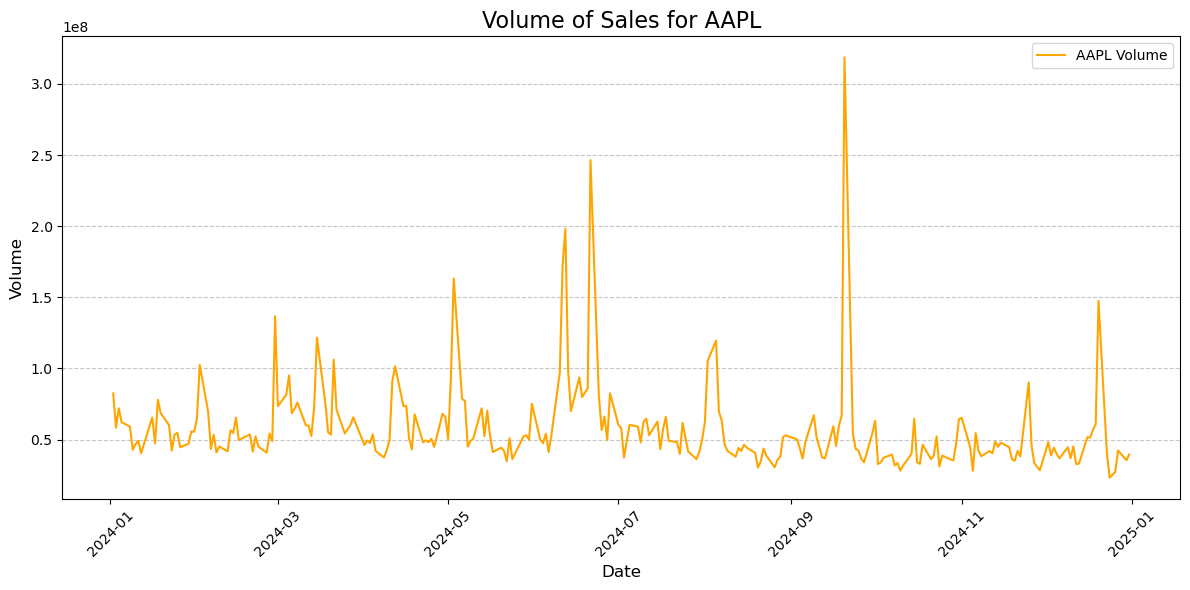

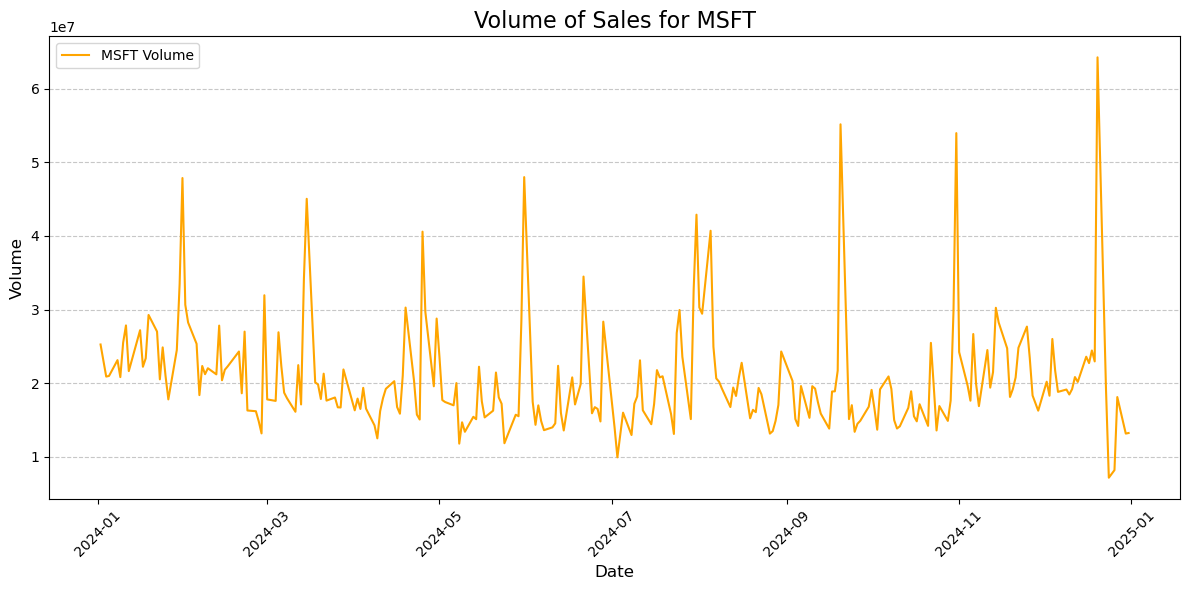

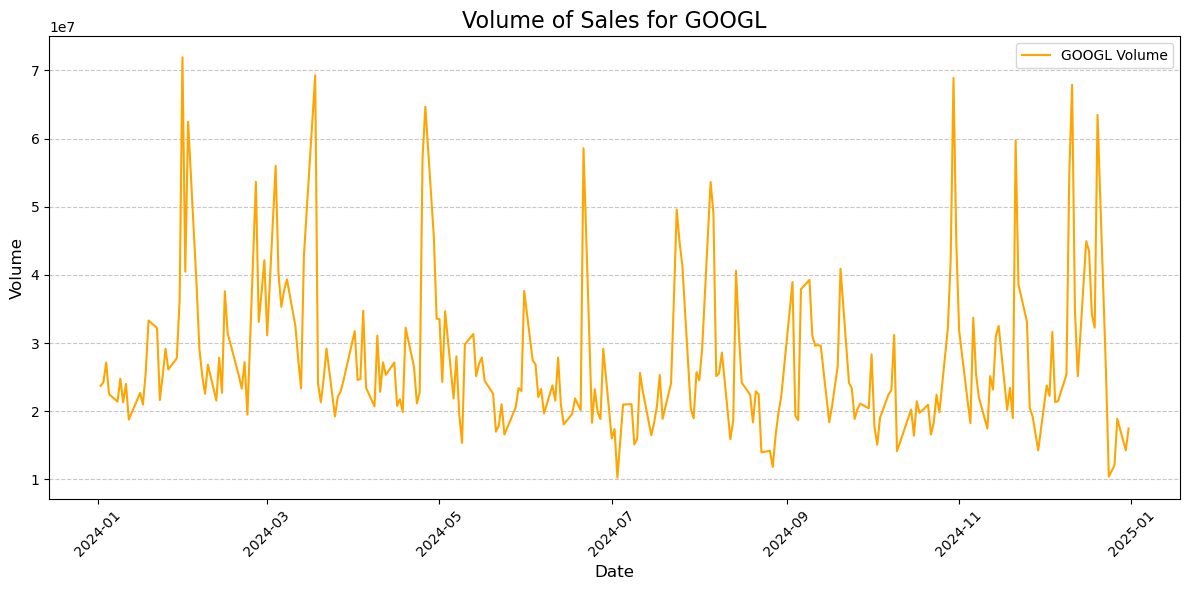

In [30]:

# Plot Volume of Sales for each company
for stock in tech_list:
    plt.figure(figsize=(12, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Volume'], label=f'{stock} Volume', color='orange')
    plt.title(f'Volume of Sales for {stock}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Volume', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
   

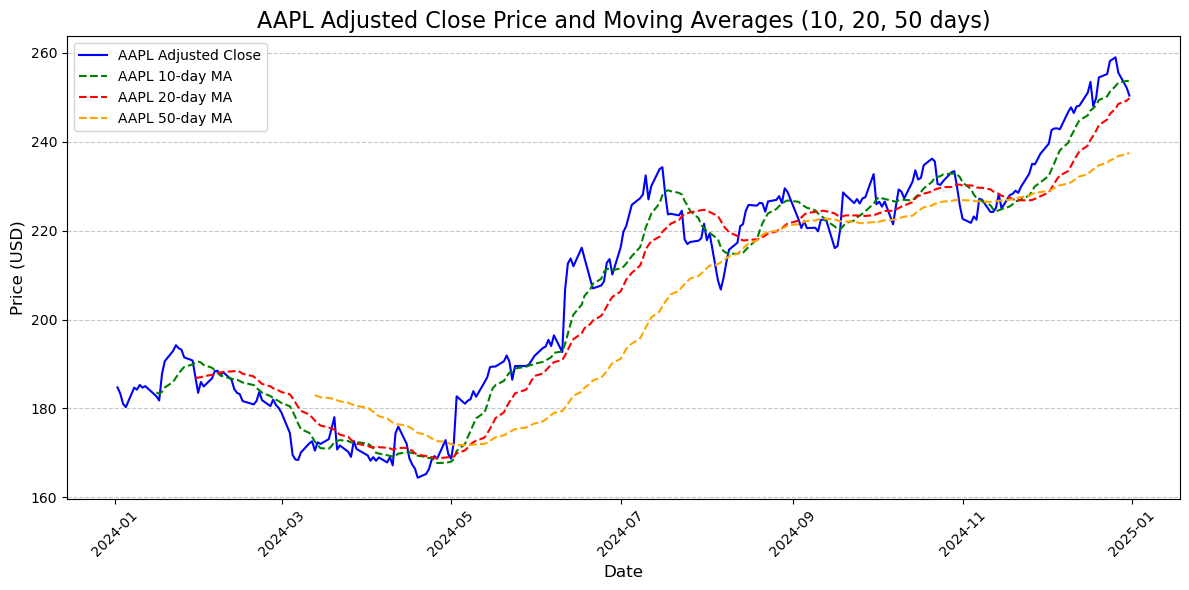

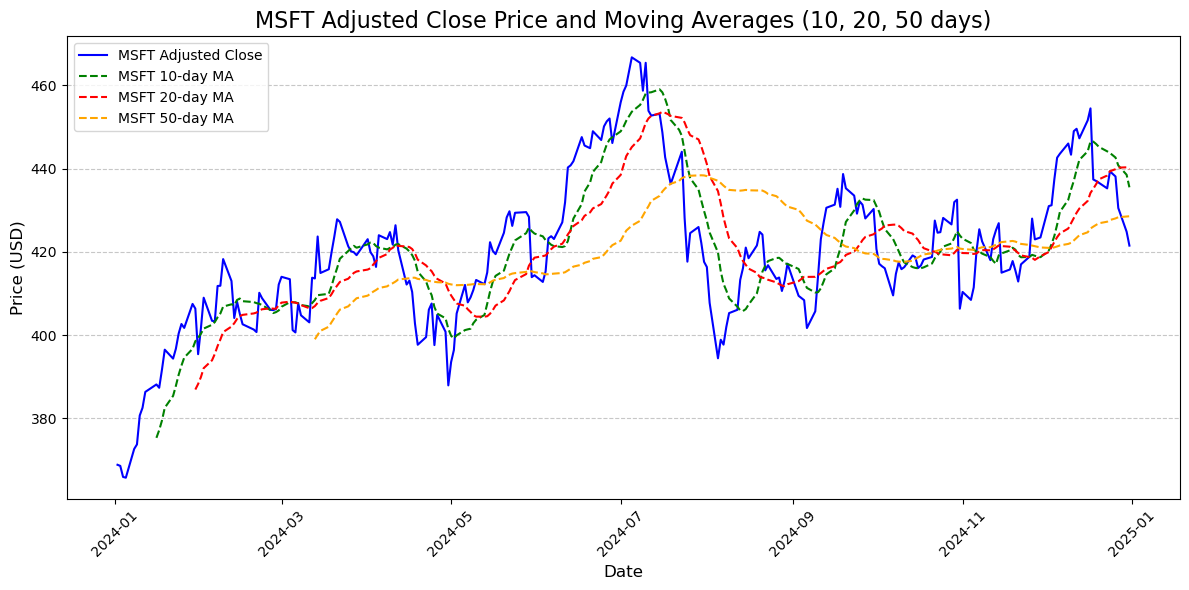

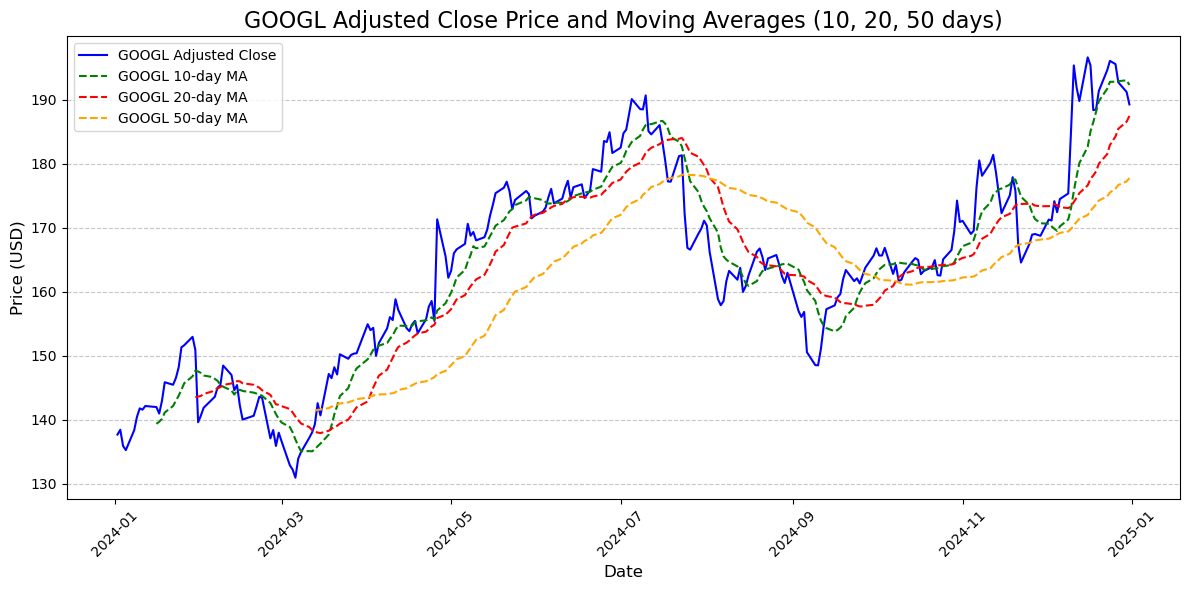

In [32]:

# Plot moving averages for 10, 20, and 50 days for each stock
for stock in tech_list:
    # Calculate moving averages for 10, 20, and 50 days
    data_dict[stock]['10_day_MA'] = data_dict[stock]['Adj Close'].rolling(window=10).mean()
    data_dict[stock]['20_day_MA'] = data_dict[stock]['Adj Close'].rolling(window=20).mean()
    data_dict[stock]['50_day_MA'] = data_dict[stock]['Adj Close'].rolling(window=50).mean()
    
    # Plot the moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Adj Close'], label=f'{stock} Adjusted Close', color='blue')
    plt.plot(data_dict[stock].index, data_dict[stock]['10_day_MA'], label=f'{stock} 10-day MA', color='green', linestyle='--')
    plt.plot(data_dict[stock].index, data_dict[stock]['20_day_MA'], label=f'{stock} 20-day MA', color='red', linestyle='--')
    plt.plot(data_dict[stock].index, data_dict[stock]['50_day_MA'], label=f'{stock} 50-day MA', color='orange', linestyle='--')
    
    plt.title(f'{stock} Adjusted Close Price and Moving Averages (10, 20, 50 days)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


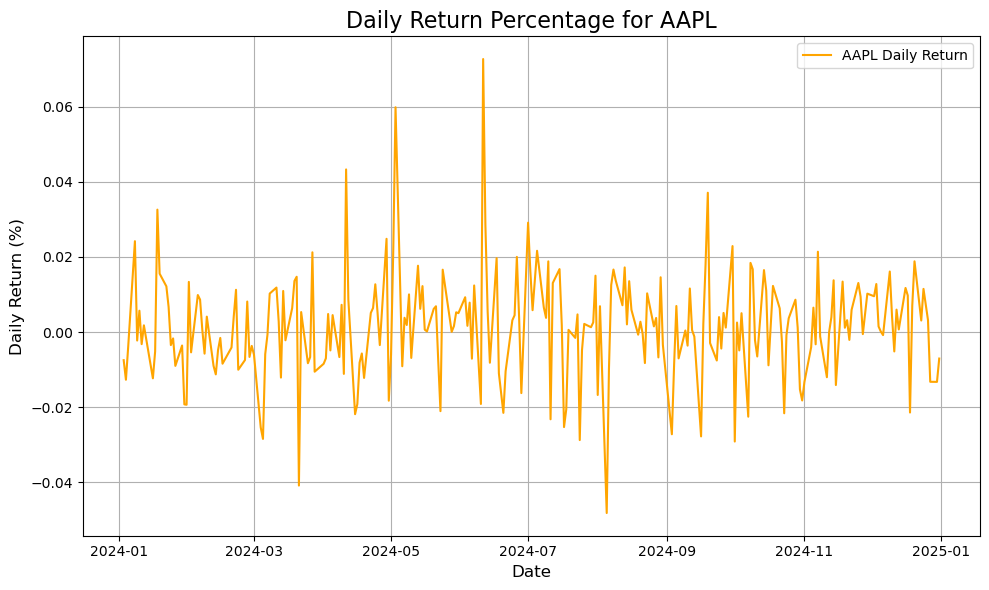

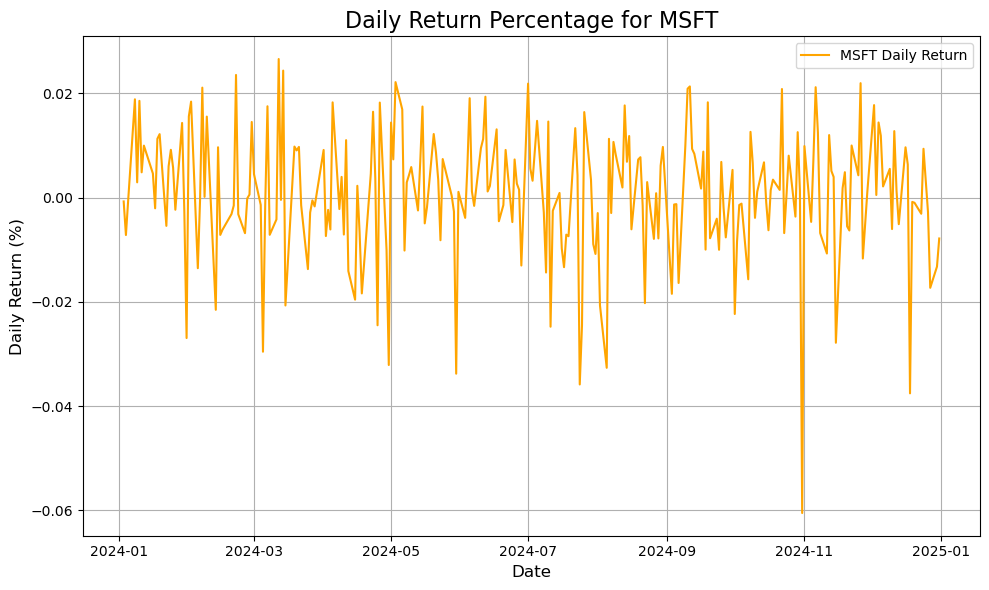

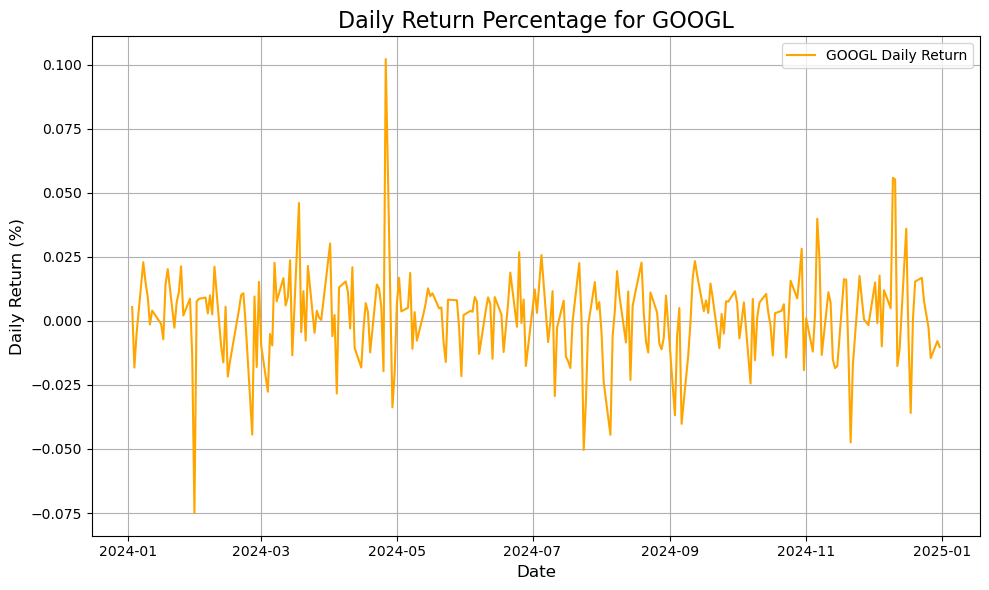

In [34]:
# Calculate the daily returns for each stock
for stock in tech_list:
    data_dict[stock]['Daily Return'] = data_dict[stock]['Adj Close'].pct_change()  # Daily percentage change
    
    # Plot the daily returns
    plt.figure(figsize=(10, 6))
    plt.plot(data_dict[stock].index, data_dict[stock]['Daily Return'], label=f'{stock} Daily Return', color='orange')
    plt.title(f"Daily Return Percentage for {stock}", fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Daily Return (%)', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


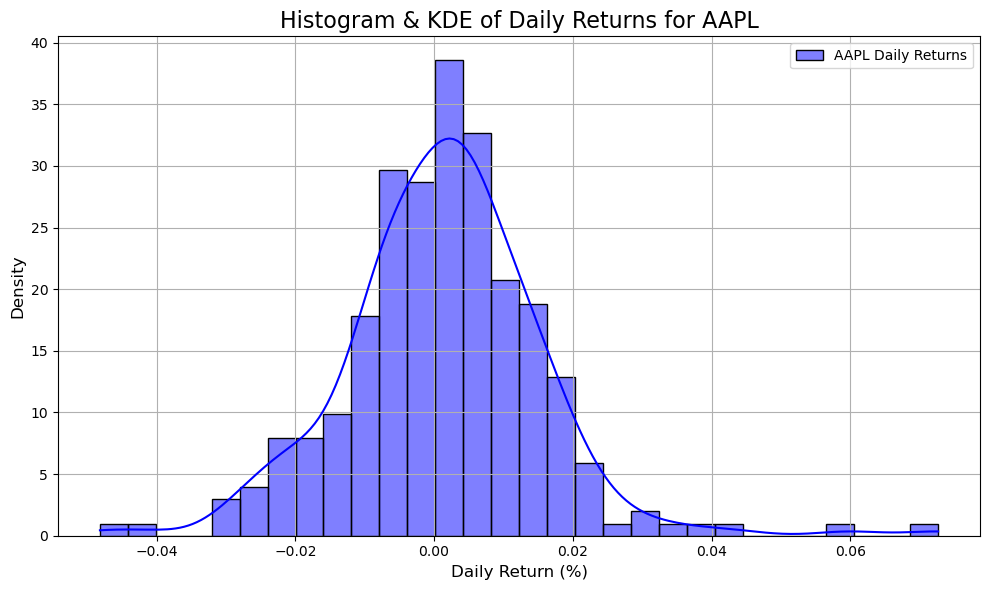

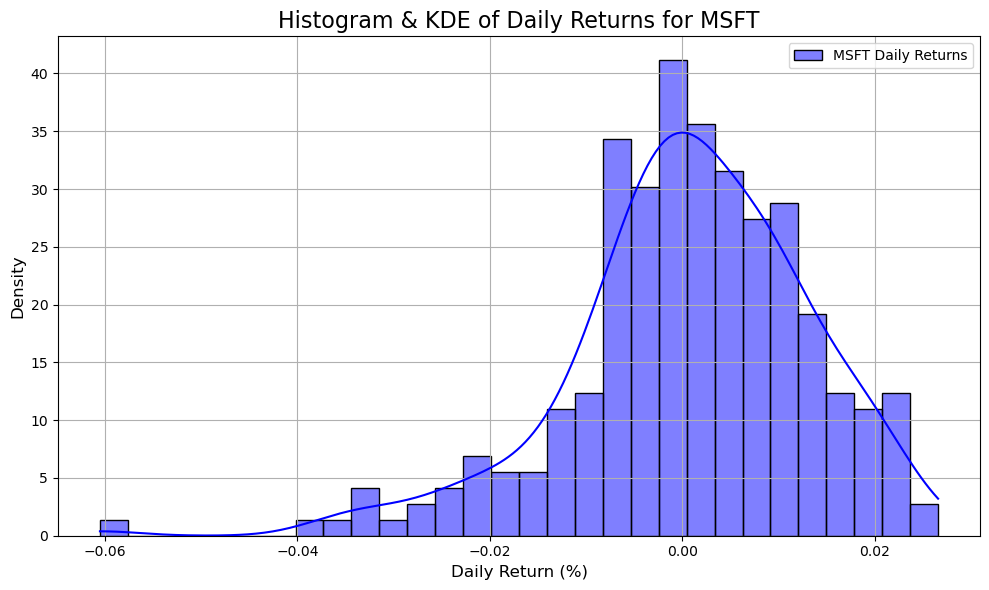

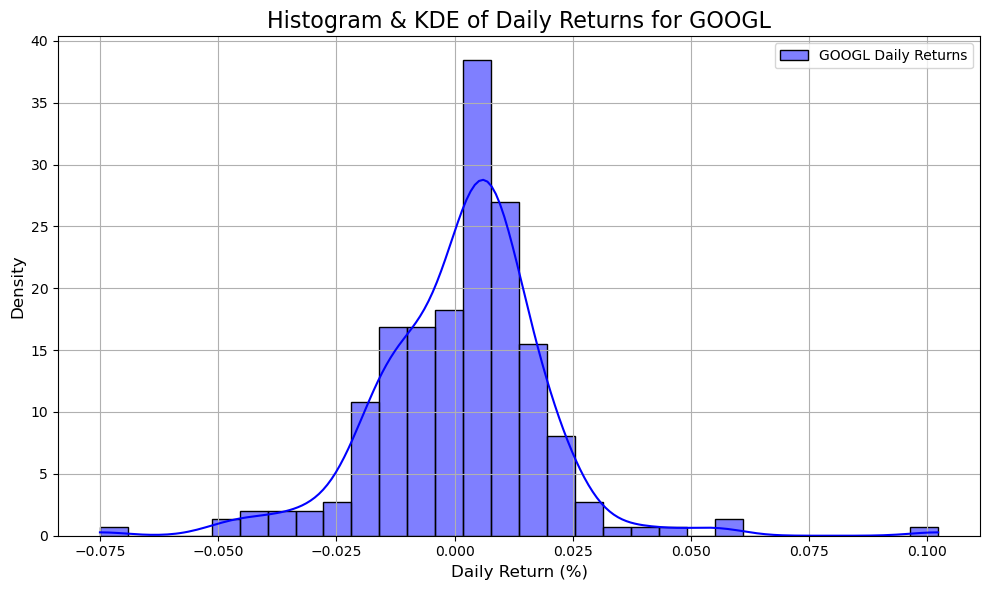

In [36]:

# Plot histograms and KDE for each company's daily returns
for stock in tech_list:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram and KDE
    sns.histplot(data_dict[stock]['Daily Return'].dropna(), kde=True, bins=30, color='blue', edgecolor='black', stat="density", label=f'{stock} Daily Returns')
    
    # Add title and labels
    plt.title(f"Histogram & KDE of Daily Returns for {stock}", fontsize=16)
    plt.xlabel("Daily Return (%)", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


                                 AAPL        MSFT       GOOGL
Date                                                         
2024-01-02 00:00:00+00:00  185.639999  370.869995  138.169998
2024-01-03 00:00:00+00:00  184.250000  370.600006  138.919998
2024-01-04 00:00:00+00:00  181.910004  367.940002  136.389999
2024-01-05 00:00:00+00:00  181.179993  367.750000  135.729996
2024-01-08 00:00:00+00:00  185.559998  374.690002  138.839996
Correlation Matrix of Closing Prices:
           AAPL      MSFT     GOOGL
AAPL   1.000000  0.514556  0.676085
MSFT   0.514556  1.000000  0.728830
GOOGL  0.676085  0.728830  1.000000


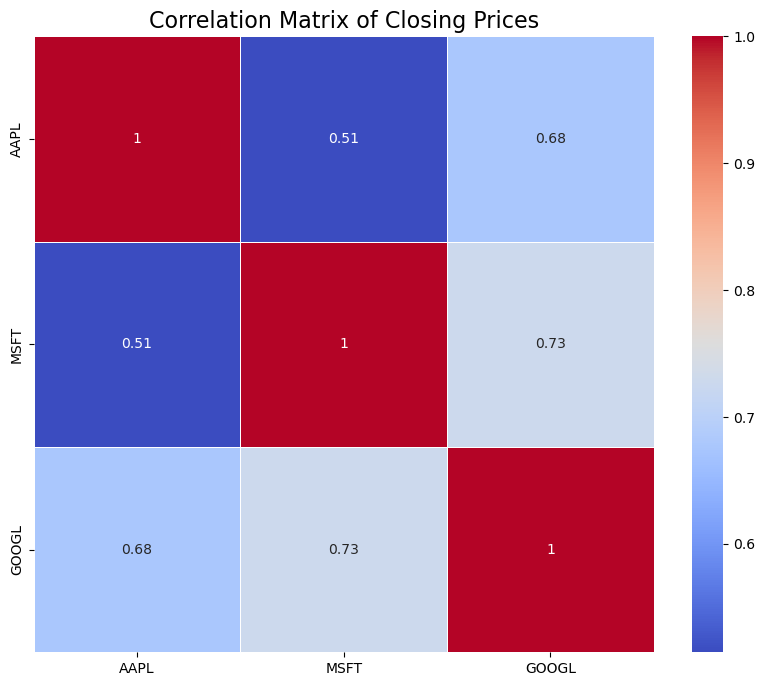

In [38]:
# Create a DataFrame with the 'Close' columns for each stock
close_prices = pd.concat({stock: data_dict[stock]['Close'] for stock in tech_list}, axis=1, join='inner')

# Rename the columns to the stock symbols (for clarity)
close_prices.columns = tech_list

# Display the first few rows of the combined DataFrame
print(close_prices.head())

# Calculate the correlation matrix of the closing prices
correlation_matrix = close_prices.corr()

# Print the correlation matrix
print("Correlation Matrix of Closing Prices:")
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Closing Prices", fontsize=16)
plt.show()


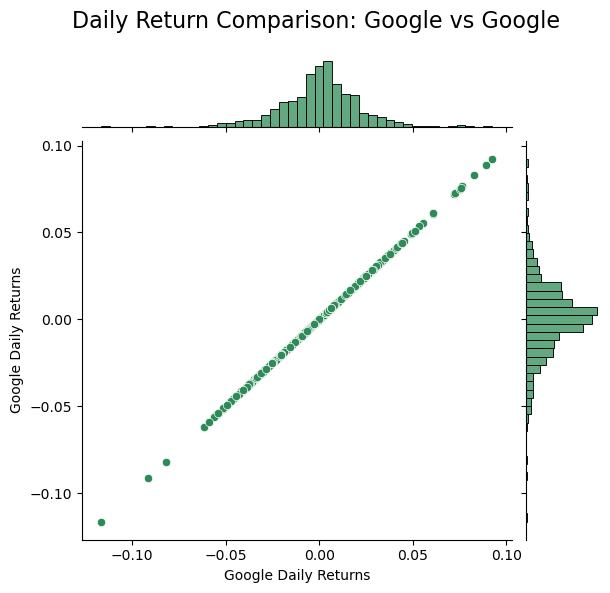

In [40]:
# Plot the relationship between Google's daily returns and itself
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_rets, kind='scatter', color='seagreen')

# Add a title for the plot
plt.subplots_adjust(top=0.9)
plt.suptitle("Daily Return Comparison: Google vs Google", fontsize=16)
plt.xlabel("Google Daily Returns")
plt.ylabel("Google Daily Returns")
plt.show()


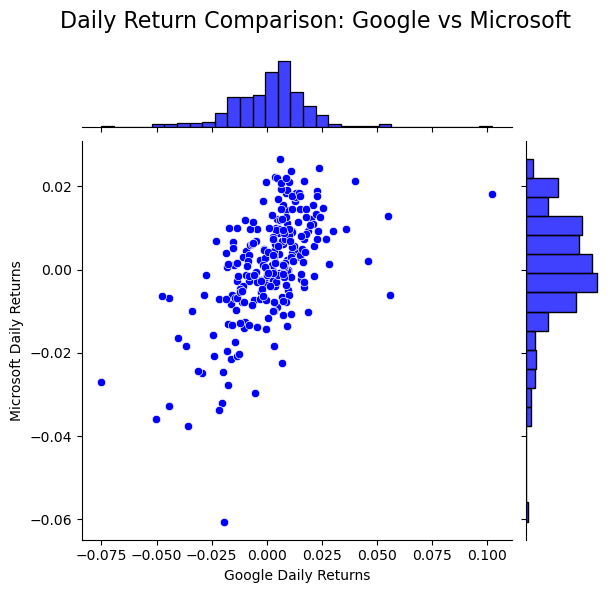

In [42]:


# Create a DataFrame with the daily returns for all stocks
tech_rets = pd.DataFrame({stock: data_dict[stock]['Daily Return'] for stock in tech_list})

# Drop NaN values that may arise from the first row's pct_change()
tech_rets.dropna(inplace=True)

# Plot the relationship between Google and Microsoft daily returns
sns.jointplot(x='GOOGL', y='MSFT', data=tech_rets, kind='scatter', color='blue')

# Add titles and adjust labels
plt.subplots_adjust(top=0.9)
plt.suptitle("Daily Return Comparison: Google vs Microsoft", fontsize=16)
plt.xlabel("Google Daily Returns")
plt.ylabel("Microsoft Daily Returns")
plt.show()


                               AAPL      MSFT     GOOGL
Date                                                   
2024-01-02 00:00:00+00:00       NaN       NaN       NaN
2024-01-03 00:00:00+00:00 -0.007488 -0.000728  0.005428
2024-01-04 00:00:00+00:00 -0.012700 -0.007178 -0.018212
2024-01-05 00:00:00+00:00 -0.004013 -0.000516 -0.004839
2024-01-08 00:00:00+00:00  0.024175  0.018872  0.022913


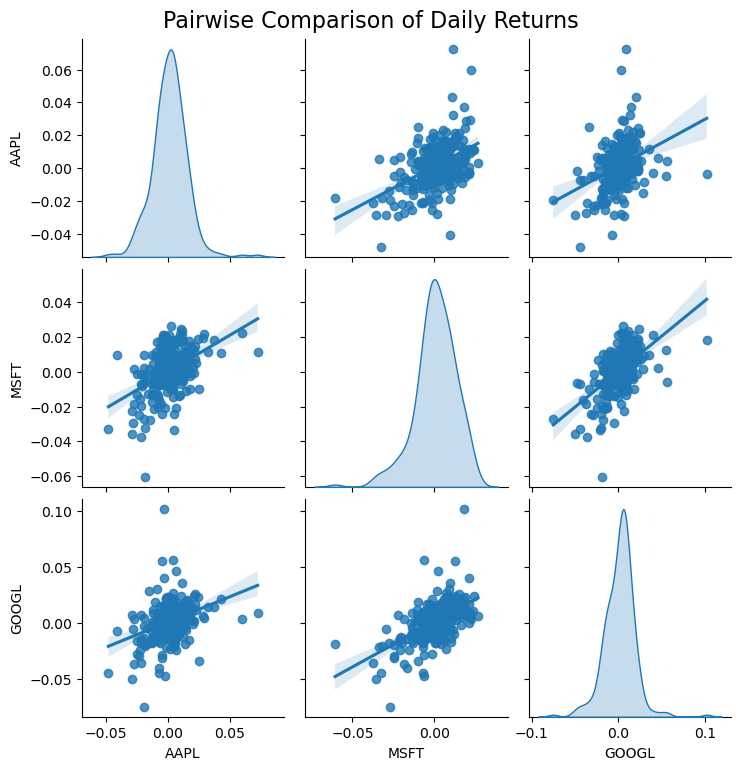

In [44]:
# Ensure daily returns (tech_rets) are calculated for each stock
tech_rets = pd.DataFrame({stock: data_dict[stock]['Daily Return'] for stock in tech_list})

# Display the first few rows of the daily returns DataFrame
print(tech_rets.head())

# Use pairplot to visualize the relationships between all stock returns
sns.pairplot(tech_rets, kind='reg', diag_kind='kde', height=2.5)

# Add a title to the pairplot
plt.suptitle("Pairwise Comparison of Daily Returns", y=1.02, fontsize=16)
plt.show()

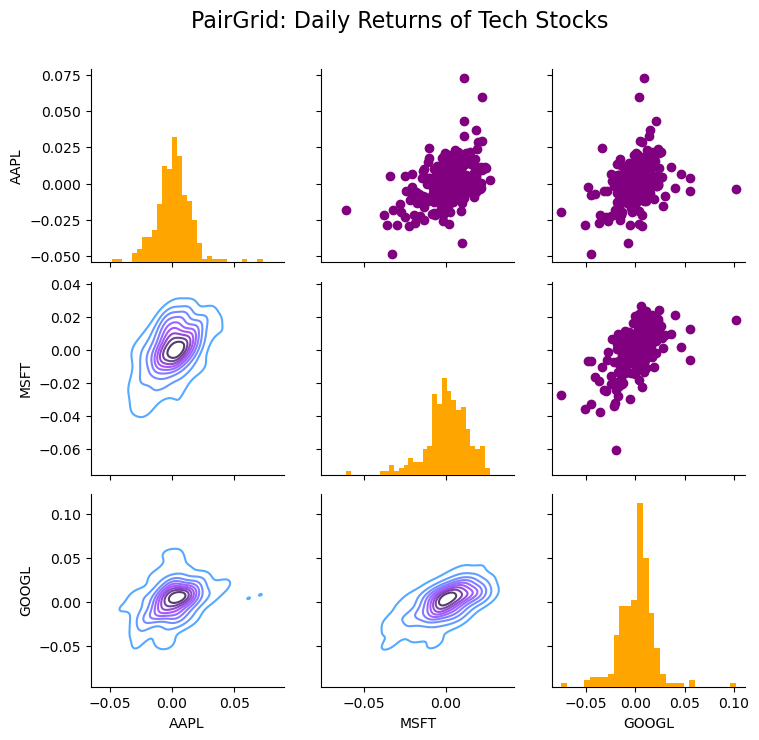

In [46]:
# Set up the PairGrid for daily returns
return_fig = sns.PairGrid(tech_rets.dropna())  # Drop NaN values to avoid issues in plotting

# Map a scatter plot to the upper triangle
return_fig.map_upper(plt.scatter, color='purple')

# Map a KDE plot to the lower triangle with a cool colormap
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Map histograms to the diagonal
return_fig.map_diag(plt.hist, bins=30, color='orange')

# Add a title to the PairGrid
plt.subplots_adjust(top=0.9)
return_fig.fig.suptitle("PairGrid: Daily Returns of Tech Stocks", fontsize=16)

# Show the plot
plt.show()

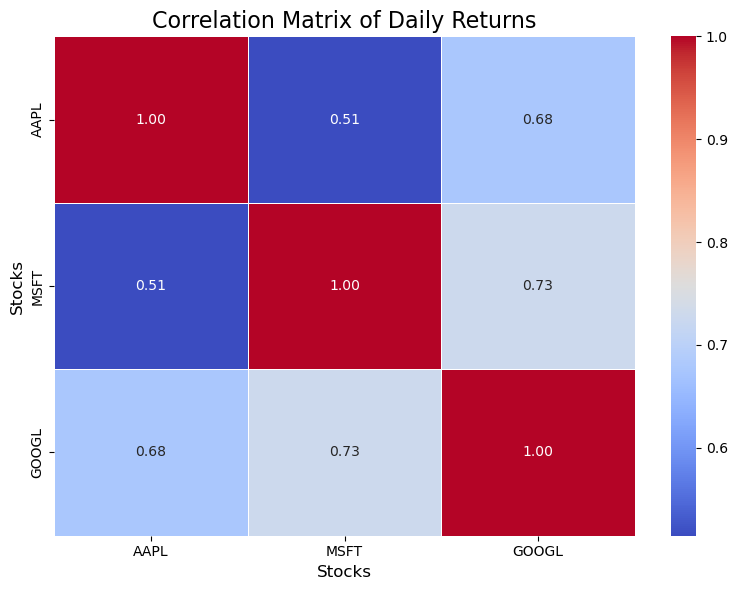

In [48]:

# Set up the figure
plt.figure(figsize=(8, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix of Daily Returns", fontsize=16)
plt.xlabel("Stocks", fontsize=12)
plt.ylabel("Stocks", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


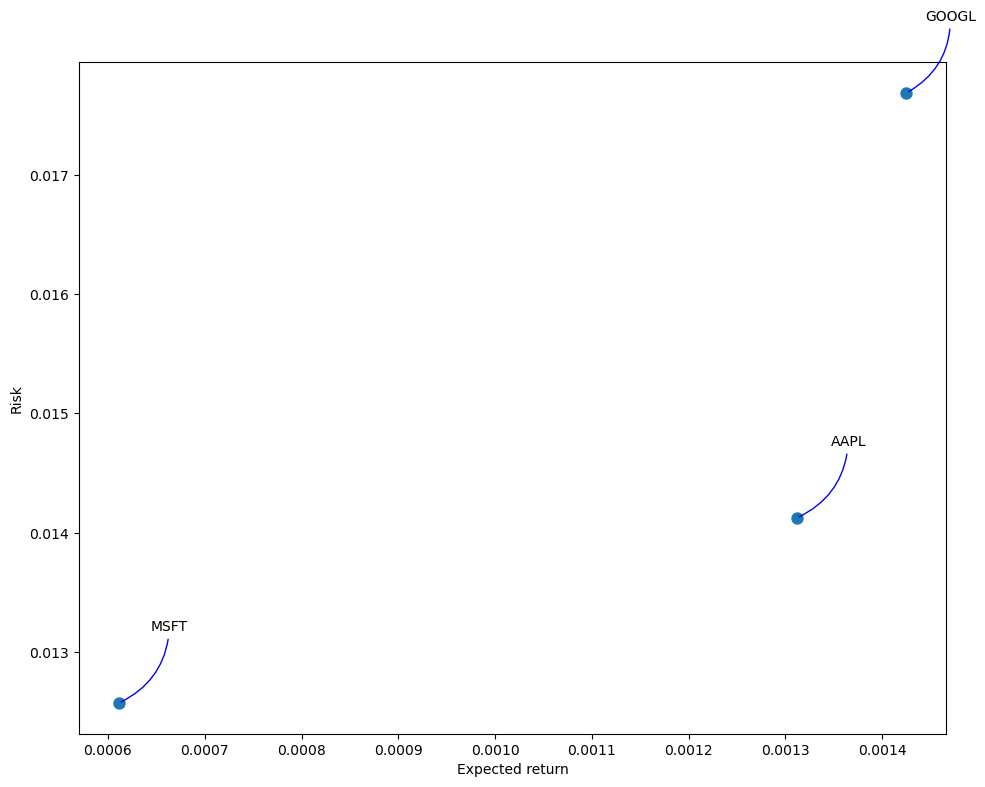

In [50]:


# Clean the data by dropping rows with NaN values
rets = tech_rets.dropna()

# Set the area size for each marker
area = np.pi * 20

# Create the figure with a size of 10x8
plt.figure(figsize=(10, 8))

# Plot the mean vs. standard deviation for each stock
plt.scatter(rets.mean(), rets.std(), s=area)

# Label the axes
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point with the stock symbol and add an arrow
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.tight_layout()
plt.show()


In [52]:


# Fetch historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Show the first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2012-01-03 00:00:00+00:00  12.388997  14.686786  14.732143  14.607143   
2012-01-04 00:00:00+00:00  12.455576  14.765714  14.810000  14.617143   
2012-01-05 00:00:00+00:00  12.593863  14.929643  14.948214  14.738214   
2012-01-06 00:00:00+00:00  12.725514  15.085714  15.098214  14.972143   
2012-01-09 00:00:00+00:00  12.705326  15.061786  15.276786  15.048214   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2012-01-03 00:00:00+00:00  14.621429  302220800  
2012-01-04 00:00:00+00:00  14.642857  260022000  
2012-01-05 00:00:00+00:00  14.819643  271269600  
2012-01-06 00:00:00+00:00  14.991786  318292800  
2012-01-09 00:00:00+00:00  15.196429  394024400  


[*********************100%***********************]  1 of 1 completed


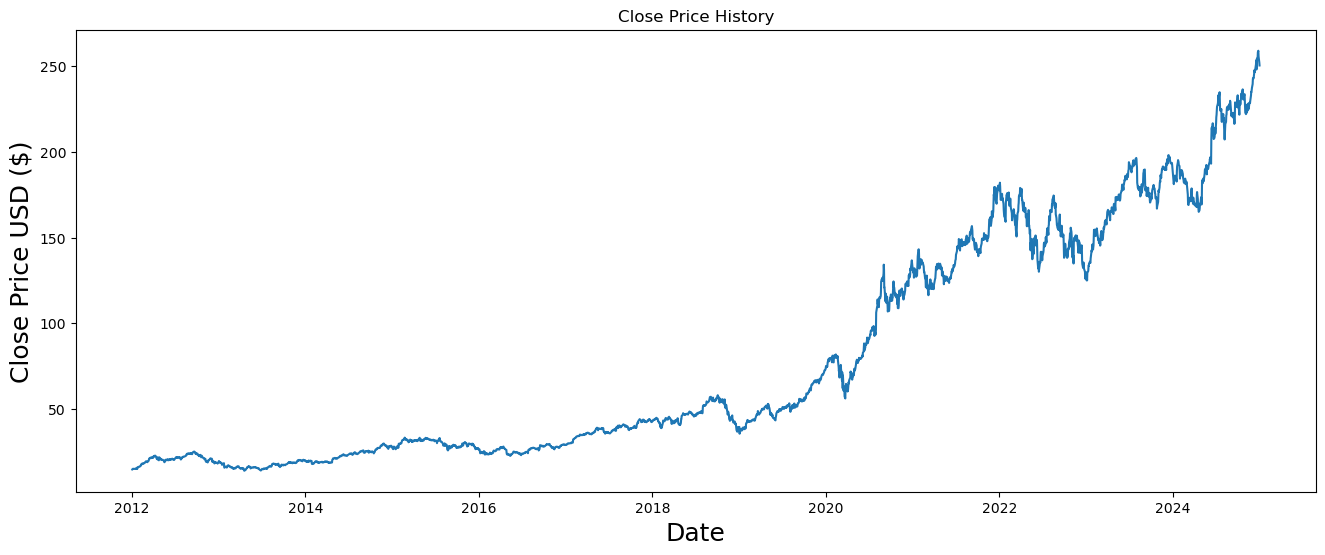

In [54]:
# Fetch historical stock data for Apple (AAPL)
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Plot the closing price history
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [56]:

# Fetch historical stock data for Apple (AAPL)
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (95% of the dataset)
training_data_len = int(np.ceil(len(dataset) * .95))

# Display the training data length
print("Training Data Length: ", training_data_len)

[*********************100%***********************]  1 of 1 completed

Training Data Length:  3107


In [60]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

ValueError: Found array with 0 feature(s) (shape=(3270, 0)) while a minimum of 1 is required by MinMaxScaler.